In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ndarray
from netCDF4 import Dataset
import numpy.ma as ma
import pickle
import seaborn as sns
from datetime import datetime
from constants import *
from DA_2019 import *
from msw_model_expanded import *
sns.set(color_codes = True)
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
DA_init_vis_dt__(EnKF)

now doing cycle: 0
now doing cycle: 1
now doing cycle: 2
now doing cycle: 3
now doing cycle: 4
time for DA initialisation with nens=  5  and ncyc=  5  equals=  0:01:03.888144


In [5]:
model_initss__(start_time=0,batch_number=0,members_per_batch=6)

Computing the 0 of t now.
Computing the 1 of t now.
Computing the 2 of t now.
Computing the 3 of t now.
Computing the 4 of t now.
Computing the 5 of t now.
Computing the 6 of t now.
Computing the 7 of t now.
Computing the 8 of t now.
Computing the 9 of t now.
Computing the 10 of t now.
Computing the 11 of t now.
Computing the 12 of t now.
Computing the 13 of t now.
Computing the 14 of t now.
Computing the 15 of t now.
Computing the 16 of t now.
Computing the 17 of t now.
Computing the 18 of t now.
Computing the 19 of t now.
Computing the 20 of t now.
Computing the 21 of t now.
Computing the 22 of t now.
Computing the 23 of t now.
Computing the 24 of t now.
Computing the 25 of t now.
Computing the 26 of t now.
Computing the 27 of t now.
Computing the 28 of t now.
Computing the 29 of t now.
Computing the 30 of t now.
Computing the 31 of t now.
Computing the 32 of t now.
Computing the 33 of t now.
Computing the 34 of t now.
Computing the 35 of t now.
Computing the 36 of t now.
Computing t

In [23]:
SWMDA = Dataset('/project/meteo/work/K.Tempest/slurm_scripts/prac/SWMDA.nc','r') 

SWM1 = Dataset('/project/meteo/work/K.Tempest/slurm_scripts/prac/SWM0_0_6.nc','r')

an_error = pickle.load(open('/project/meteo/work/K.Tempest/slurm_scripts/prac/dicts.an_error','rb'))
bg_error = pickle.load(open('/project/meteo/work/K.Tempest/slurm_scripts/prac/dicts.bg_error','rb'))

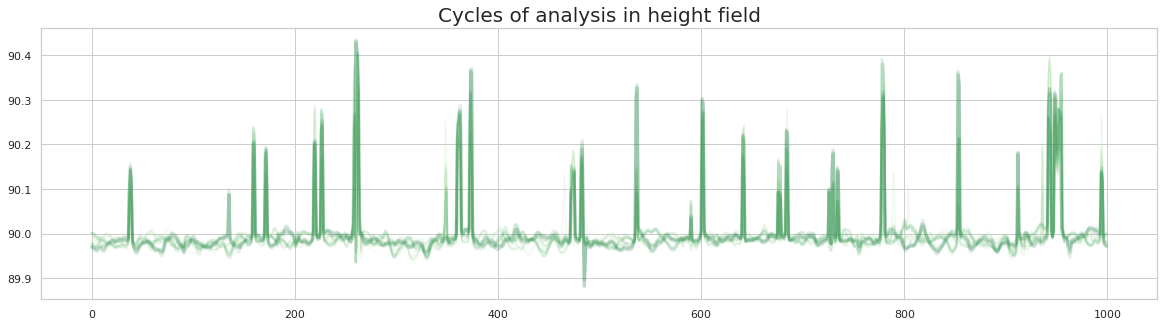

In [20]:
var = 1
plt.figure(figsize=[20,5])
for i in range(ncyc):
    analysis = ma.getdata(SWMDA['/DA/analysis'][-i,var*n:(var+1)*n,:])   # ('number of DA cycles','total data','number of ensembles')
    mean = np.mean(analysis,axis=1)
    lwi = ((i/ncyc)*4)
    plt.plot(analysis,lw=lwi,color=plt.cm.Greens(i/ncyc),alpha=0.1)

plt.title('Cycles of analysis in height field',fontsize=20)
plt.show()

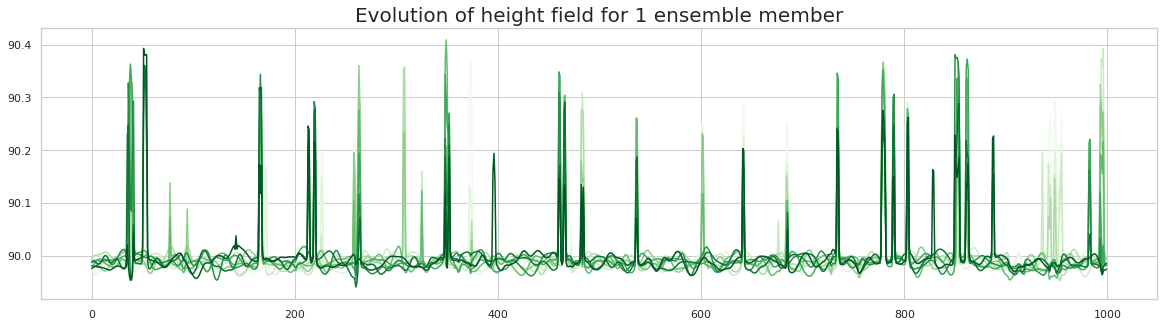

In [22]:
var = 1
plt.figure(figsize=[20,5])
for i in range(10):
    truth = ma.getdata(SWM1['/free_run/truth'][n:2*n,1,2*i])   # ('number of DA cycles','total data','number of ensembles')
    plt.plot(truth,color=plt.cm.Greens((i+0.4)/10),alpha=1)
    
plt.title('Evolution of height field for 1 ensemble member',fontsize=20)
plt.show()

Text(0, 0.5, 'rmse')

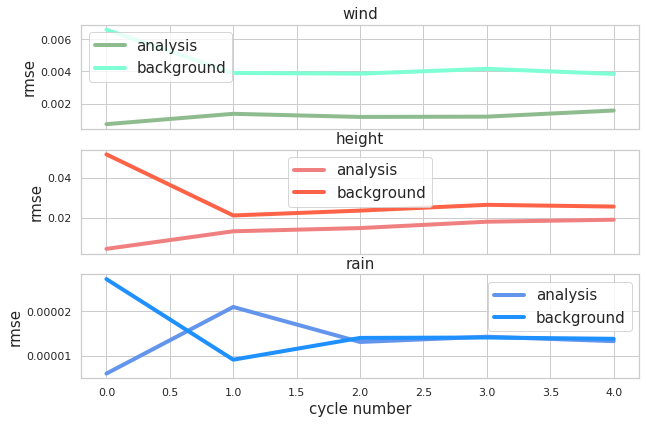

In [25]:
x = np.arange(5)

f, ax = plt.subplots(3,sharex = 'col', figsize = (10,6.5))

ax[0].plot(x,an_error['u'],c='darkseagreen',lw=4,label='analysis')
ax[0].plot(x,bg_error['u'],c='aquamarine',lw=4,label='background')
ax[0].set_ylabel('rmse',fontsize=15)
ax[0].set_title('wind',fontsize=15)

ax[0].legend(fontsize=15)

ax[1].plot(x,an_error['h'],c='lightcoral',lw=4,label='analysis')
ax[1].plot(x,bg_error['h'],c='tomato',lw=4,label='background')
ax[1].set_ylabel('rmse',fontsize=15)
ax[1].set_title('height',fontsize=15)

ax[1].legend(fontsize=15)

ax[2].plot(x,an_error['r'],c='cornflowerblue',lw=4,label='analysis')
ax[2].plot(x,bg_error['r'],c='dodgerblue',lw=4,label='background')

ax[2].legend(fontsize=15)
ax[2].set_xlabel('cycle number',fontsize=15)
ax[2].set_title('rain',fontsize=15)
ax[2].set_ylabel('rmse',fontsize=15)
